----------------------
# Fundamentals of Data Analytics - Project 2020
### Eoin Lees - G00387888 - January 2021
--------------

# Instructions

In this project you must perform and explain simple linear regression using Python
on the powerproduction dataset available on Moodle. The goal is to accurately predict
wind turbine power output from wind speed values using the data set as a basis.
Your submission must be in the form of a git repository containing, at a minimum, the
following items:

1. Jupyter notebook that performs simple linear regression on the data set.
2. In that notebook, an explanation of your regression and an analysis of its accuracy.
3. Standard items in a git repository such as a README.

To enhance your submission, you might consider comparing simple linear regression to
other types of regression on this data set. Rest assured, all the above concepts will be
explored in lecture videos and other materials in the coming semester.

---------------------------
# Introduction

---------------------------

The purpose of this project is to take a data set and perform linear regressio on it. While doing so the following points must be achieved: 

* Preform analysis
* model best fit line as best as possible
* explain decisions
* Proove that line is best fit - cost of line vs other lines (complex vs simple)
* Prove how well teh line fits the dataset
* 

This analysis is performed on a dataset that shows how much power is produced by a wind turbine depending on a specific wind speed. 

The methods applied could be applied to similar datasets. 

## Simple linear regression

"Linear regression is the most widely used statistical technique; it is a way to model a relationship between two sets of variables. The result is a linear regression equation that can be used to make predictions about data." [[1]](Linear regression is the most widely used statistical technique; it is a way to model a relationship between two sets of variables. The result is a linear regression equation that can be used to make predictions about data.)



## Complex linear regression


## Dataset

Variables: Speed vs power

**Speed**
* Wind speed

**Power**
* Power generated for wind speed

# References

[1] Linear Regression: Simple Steps, Video. Find Equation, Coefficient, Slope; Statistics How To;  https://www.statisticshowto.com/probability-and-statistics/regression-analysis/find-a-linear-regression-equation/

## Import modules and plot styles

In [1]:
#Import Modules
import pandas as pd
import matplotlib.style as style
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression

In [2]:
# Stlyes available for plots
style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

In [46]:
style.use('fivethirtyeight')

## Import Data

In [8]:
dfpowprod = pd.read_csv("https://raw.githubusercontent.com/eoinlees/FoDA-Project-2020/main/powerproduction.csv")
dfpowprod

,speed,power
0,0.000,0.0
1,0.125,0.0
2,0.150,0.0
3,0.225,0.0
4,0.275,0.0
...,...,...
495,24.775,0.0
496,24.850,0.0
497,24.875,0.0
498,24.950,0.0


## Initial  analysis and plots

In [24]:
# Desribe Variables
dfpowprod.describe()

,speed,power
count,500.000000,500.000000
mean,12.590398,48.014584
std,7.224991,41.614572
min,0.000000,0.000000
25%,6.324750,5.288000
50%,12.550500,41.645500
75%,18.775250,93.537000
max,25.000000,113.556000


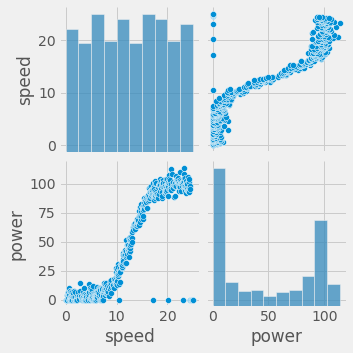

In [47]:
# https://seaborn.pydata.org/generated/seaborn.pairplot.html
sns.pairplot(dfpowprod)

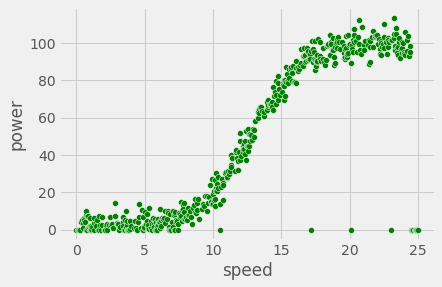

In [48]:
# Seaborn scatterplot of wind speed vs power from df_wind

sns.scatterplot(data=dfpowprod, x="speed", y="power", color='g')
plt.show()

## Clean the data set

In [29]:
# Selecting all the outlier datapoints where wind speed > 0 & powerout = 0
df_out = dfpowprod[(dfpowprod["speed"]>10) & (dfpowprod["power"]==0)]

print(df_out)
df_out.count()

      speed  power
208  10.511    0.0
340  17.167    0.0
404  20.095    0.0
456  22.998    0.0
490  24.499    0.0
491  24.525    0.0
492  24.575    0.0
493  24.650    0.0
494  24.750    0.0
495  24.775    0.0
496  24.850    0.0
497  24.875    0.0
498  24.950    0.0
499  25.000    0.0


speed    14
power    14
dtype: int64

In [33]:
# remove the outliers to clean up the dataset
dfClean = dfpowprod.drop(df_out.index, axis=0)

# Output cleaned dataset as a csv file
dfClean.to_csv("powerproduction.csv", index=False, encoding='utf8')

In [34]:
dfClean.describe()

,speed,power
count,486.000000,486.000000
mean,12.298311,49.397720
std,7.084043,41.391996
min,0.000000,0.000000
25%,6.137250,5.868250
50%,12.349500,44.773000
75%,18.386750,93.751250
max,24.399000,113.556000



When outliers are removed the average speed & max speed of the dataset have been reduced. 

The cleaned up dataset is output as "powerproduction.csv" and saved so it can be accessed locally. 

---------------------

### Research

displot vs distplot

uses for each. why one is being removed

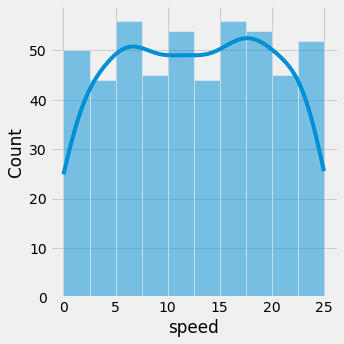

In [11]:
sns.displot(dfpowprod["speed"], kde=True);

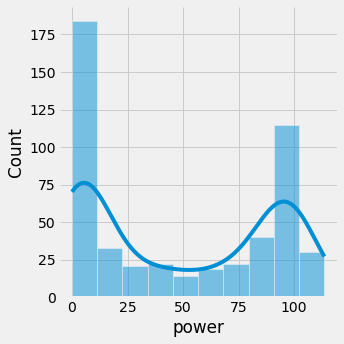

In [12]:
sns.displot(dfpowprod["power"], kde=True);

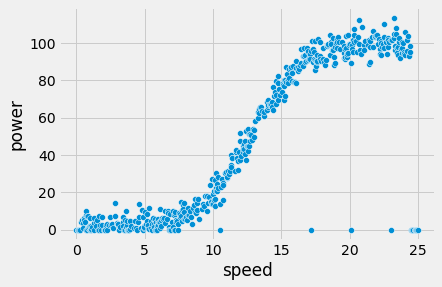

In [13]:
sns.scatterplot(data=dfpowprod, x="speed", y="power");

# Explination + analysis


Loads of analysis! Explain everything

Whats a regplot? regression? 

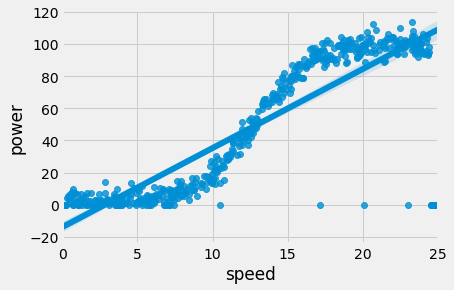

In [17]:
sns.regplot(x="speed", y="power", data=dfpowprod);

 ## https://seaborn.pydata.org/tutorial/regression.html
 
 Refer to this for correct plots
 
 research complex linear regression - curved lines
 
 https://seaborn.pydata.org/generated/seaborn.regplot.html
 
 --------------

# Linear Regression

--------------------------

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

linear regression model? 

In [15]:
# Perform linear regression
lr = LinearRegression()

# convert data into numpy array
X = dfpowprod.speed.values.reshape(-1, 1)
Y = dfpowprod.power.values.reshape(-1, 1)


lr.fit(X, Y)

# Y predictions off of X values
Y_pred = lr.predict(X)


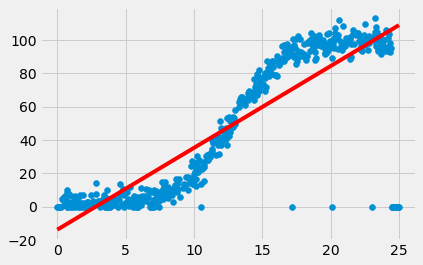

In [16]:
# Visualise the results

# create scatterplot from dataset
plt.scatter(X,Y)

# create regression line
plt.plot(X, Y_pred, color='red')

# show plot
plt.show()

 linik to plot above [[1]](https://towardsdatascience.com/linear-regression-in-6-lines-of-python-5e1d0cd05b8d)

------------------
# Complex Linear regression
----------------

Info for creating curve fit lines here: 

https://machinelearningmastery.com/curve-fitting-with-python/

read + get best fit. 

Justify best fit

y = 6.67419 * x + -0.07022 * x^2 + -21.22684


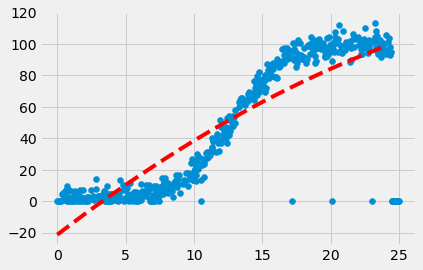

In [20]:
# fit a second degree polynomial to the economic data
from numpy import arange
from pandas import read_csv
from scipy.optimize import curve_fit
from matplotlib import pyplot
 
# define the true objective function
def objective(x, a, b, c):
    return a * x + b * x**2 + c
 
# load the dataset
data = dfpowprod.values
# choose the input and output variables
x, y = data[:, 0], data[:, 1]
# curve fit
popt, _ = curve_fit(objective, x, y)
# summarize the parameter values
a, b, c = popt
print('y = %.5f * x + %.5f * x^2 + %.5f' % (a, b, c))
# plot input vs output
pyplot.scatter(x, y)
# define a sequence of inputs between the smallest and largest known inputs
x_line = arange(min(x), max(x), 1)
# calculate the output for the range
y_line = objective(x_line, a, b, c)
# create a line plot for the mapping function
pyplot.plot(x_line, y_line, '--', color='red')
pyplot.show()

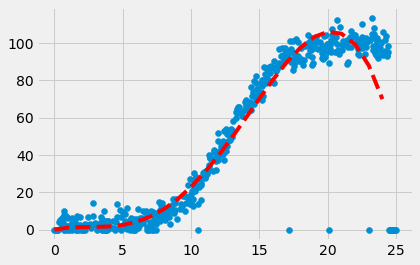

In [23]:
# fit a fifth degree polynomial to the economic data
from numpy import arange
from pandas import read_csv
from scipy.optimize import curve_fit
from matplotlib import pyplot
 
# define the true objective function
def objective(x, a, b, c, d):#, e, f):
    return (a * x) + (b * x**2) + (c * x**3) + (d * x**4)# + (e * x**5) + f
 
# load the dataset
data = dfpowprod.values

# choose the input and output variables
x, y = data[:, 0], data[:, 1]

# curve fit
popt, _ = curve_fit(objective, x, y)

# summarize the parameter values
a, b, c, d = popt #, e, f 

# plot input vs output
pyplot.scatter(x, y)

# define a sequence of inputs between the smallest and largest known inputs
x_line = arange(min(x), max(x), 1)

# calculate the output for the range
y_line = objective(x_line, a, b, c, d) #, e, f

# create a line plot for the mapping function
pyplot.plot(x_line, y_line, '--', color='red')
pyplot.show()

Understand above code

-------------------------
# Results
-------------------------

-------------------------
# Analysis
-------------------------

# Conclusions




# References
------------------------

[1] https://towardsdatascience.com/linear-regression-in-6-lines-of-python-5e1d0cd05b8d